In [169]:
# import library
import copy
import matplotlib.pyplot as plt
import cv2
import numpy

In [170]:
class image:
    data:numpy.array
    height:int
    width:int
    N:int

    def __init__(self, img_path) -> None:
        self.data = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
        self.height, self.width, _ = self.data.shape
        self.N = self.height        # N * N image only.
        print(self.data.shape)

    def encode(self, times=1):       # Shuffle times default to 1
        prev_data = self.data
        encoded_data = numpy.zeros(shape=self.data.shape)      # create new image
        for time in range(times):
            for x in range(self.height):
                for y in range(self.width):
                    new_x = (1 * x + 1 * y) % self.N
                    new_y = (1 * x + 2 * y) % self.N

                    encoded_data[new_x, new_y, :] = prev_data[x, y, :]
            prev_data = copy.deepcopy(encoded_data)
    
        return encoded_data.astype('uint8')


(256, 256, 3)


Text(0.5, 1.0, '192th Shuffle')

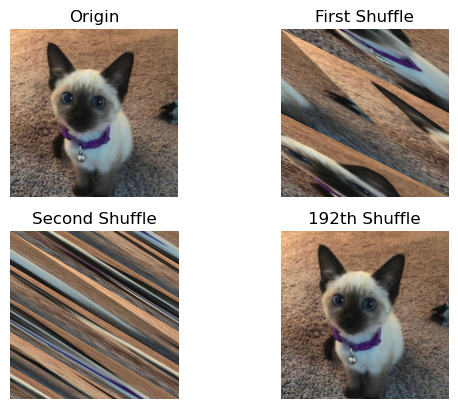

In [171]:
cat = image("cat256.png")

fig = plt.figure()

fig.add_subplot(2,2,1)

plt.imshow(cat.data)
plt.axis('off') 
plt.title("Origin")

fig.add_subplot(2,2,2)

plt.imshow(cat.encode(1))
plt.axis('off') 
plt.title("First Shuffle")

fig.add_subplot(2,2,3)

plt.imshow(cat.encode(2))
plt.axis('off') 
plt.title("Second Shuffle")

fig.add_subplot(2,2,4)

plt.imshow(cat.encode(192))
plt.axis('off') 
plt.title("192th Shuffle")